In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q1 part a

In [ ]:
matrices = []
for k in range(5):
  true_k = k+1
  matrices.append([])
  for i in range(10):
    true_i = i+1
    matrices[k].append([])
    for j in range(10):
      true_j = j+1
      if true_i < true_j:
        value = np.exp(true_i/true_j) * np.cos(true_i*true_j) * np.sin(true_k)
      elif true_i > true_j:
        value = matrices[k][j][i]
      else:
        value = 0
      matrices[k][i].append(value)

  for d in range(10):
    true_d = d + 1
    sum = 0
    for l in range(10):
      if l != d:
        sum += np.abs(matrices[k][d][l])
    value = (true_d/10) * np.abs(np.sin(true_k)) + sum
    matrices[k][d][d] = value

  matrices[k] = np.array(matrices[k])

vectors = []
for k in range(5):
  vectors.append([])
  for i in range(10):
    true_i = i+1
    true_k = k+1
    vectors[k].append(np.exp(true_i/true_k) * np.sin(true_i*true_k))

In [ ]:
x1 = np.ones(10)

for k in range(5):
  print(np.dot(x1, matrices[k] @ x1) - np.dot(x1, vectors[k]))


5337.066429311362
12.104221222535315
29.4798349941795
78.82665877069525
101.1388127109267


Subgradient Method

In [ ]:
def pointwise_max_subgradient(functions, matrices, vectors, x):
  i = np.argmax([f(x) for f in functions])
  gradient = 2 * matrices[i] @ x - vectors[i]
  
  return gradient

In [ ]:
xs = [np.ones(10)]
T = 100000
C = 0.005

functions = [lambda x, matrices=matrices, vectors=vectors, k=k: np.dot(x, matrices[k] @ x) - np.dot(x, vectors[k]) for k in range(5)]

for i in range(1, T):
  x_curr = xs[-1]
  g = pointwise_max_subgradient(functions, matrices, vectors, x_curr)
  x_next = x_curr - C/np.sqrt(i) * g
  xs.append(x_next) 

losses_std = []
for x in xs:
  losses_std.append(np.max([f(x) for f in functions]))

print("minimum loss: ", min(losses_std))
print("minimum index: ", np.argmin(losses_std))
print("x: ", xs[np.argmin(losses_std)])

minimum loss:  -0.8412686337442031
minimum index:  84764
x:  [-0.12630827 -0.03434992 -0.00683659  0.02625605  0.06717221 -0.27857058
  0.07446874  0.13815616  0.08451149  0.03914766]


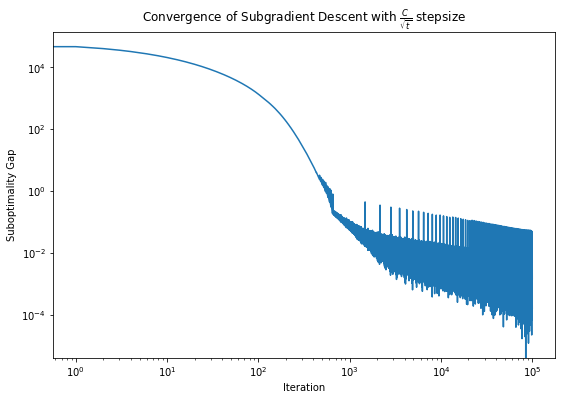

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(T), np.array(losses_std) - min(losses_std))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Suboptimality Gap')
ax.set_xlabel('Iteration')
ax.set_title('Convergence of Subgradient Descent with $\\frac{C}{\\sqrt{t}}$ stepsize')
plt.show()

In [ ]:
xs = [np.ones(10)]
f_star = min(losses_std)
C = 0.003

for i in range(1, T):
  x_curr = xs[-1]
  g = pointwise_max_subgradient(functions, matrices, vectors, x_curr)
  x_next = x_curr - C*(np.max([f(x_curr) for f in functions]) - f_star)/np.linalg.norm(g) * g
  xs.append(x_next) 

losses_polyak = []
for x in xs:
  losses_polyak.append(np.max([f(x) for f in functions]))

print("minimum loss: ", min(losses_polyak))
print("minimum index: ", np.argmin(losses_polyak))
print("x: ", xs[np.argmin(losses_polyak)])

minimum loss:  -0.8396508254049737
minimum index:  99985
x:  [-0.11684631 -0.03041908 -0.00267528  0.02622158  0.05925091 -0.27796773
  0.08195274  0.14446972  0.08217645  0.03607415]


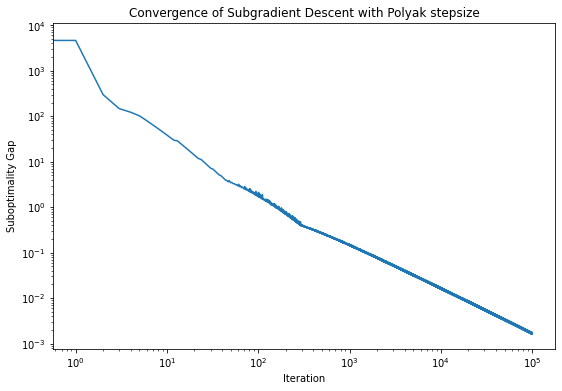

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(T), np.array(losses_polyak) - min(losses_std))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Suboptimality Gap')
ax.set_xlabel('Iteration')
ax.set_title('Convergence of Subgradient Descent with Polyak stepsize')
plt.show()